In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data1 = pd.read_csv('/content/drive/MyDrive/Colab/ex1data1.txt', names=['Population', 'Profit'])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


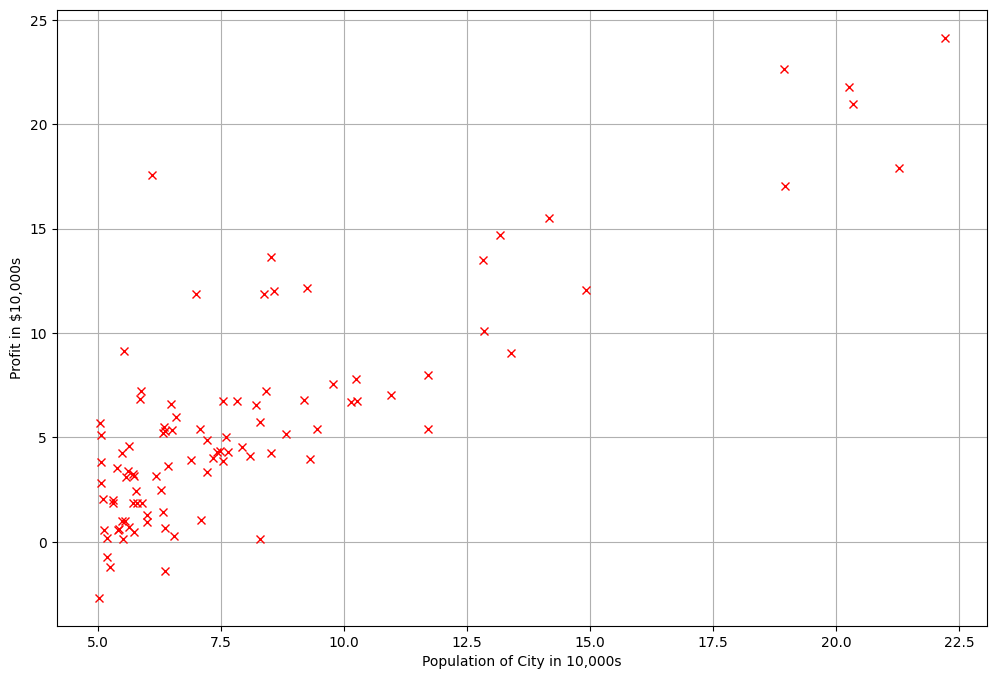

In [2]:
plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx');

In [3]:
# Get the number of features.
n = len(data1.columns)-1 # subtract the target column

# Create a function to pepare the data.
def prepareData(data, n):
    """
    Add 1s column, convert to matrices,
    initialize theta.
    Args:
        data: read the data file
        n: int
    Return:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    """
    # Add a column with 1s in the data set.
    data.insert(0, 'Ones', 1)

    # Define X and y, separating the data set.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convert to matrices and initialize parameters theta to 0s.
    # Theta is a vector [n + 1 x 1] and Theta Transpose is a vector [1 x n+1],
    # where n is the number of features.
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

x, y, theta = prepareData(data1, n)

In [4]:
# Initialize parameters for iterations and learning rate α.
iterations = 1500
alpha = 0.01

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [5]:
# Create a function to compute cost.
def computeCost(x, y, theta):
    """
    Compute the cost function.
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

computeCost(x, y, theta)

32.072733877455676

In [6]:
# Create a function to implement gradient descent.
def gradientDescent(x, theta, iterations):
    """
    Implement gradient descent.
    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
    Return:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
    """
    m = len(x)
    J_vals = []

    for i in range(iterations):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
    return (theta, J_vals)

theta, J_vals = gradientDescent(x, theta, iterations)

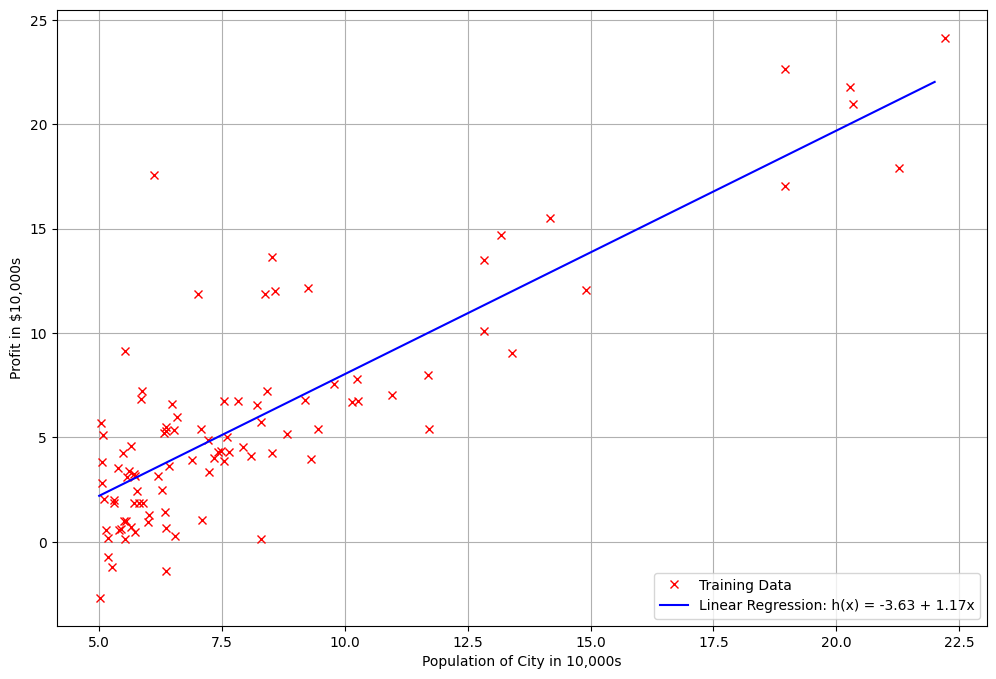

In [7]:
theta_f = list(theta.flat)
xs = np.arange(5, 23)
ys = theta_f[0] + theta_f[1] * xs

plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx', label='Training Data')
plt.plot(xs, ys, 'b-', label='Linear Regression: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.legend(loc=4);

In [8]:
# Predict the profit for population of 35000 and 70000.
print((theta_f[0] + theta_f[1] * 3.5) * 10000)
print((theta_f[0] + theta_f[1] * 7) * 10000)

4519.767867701772
45342.45012944714


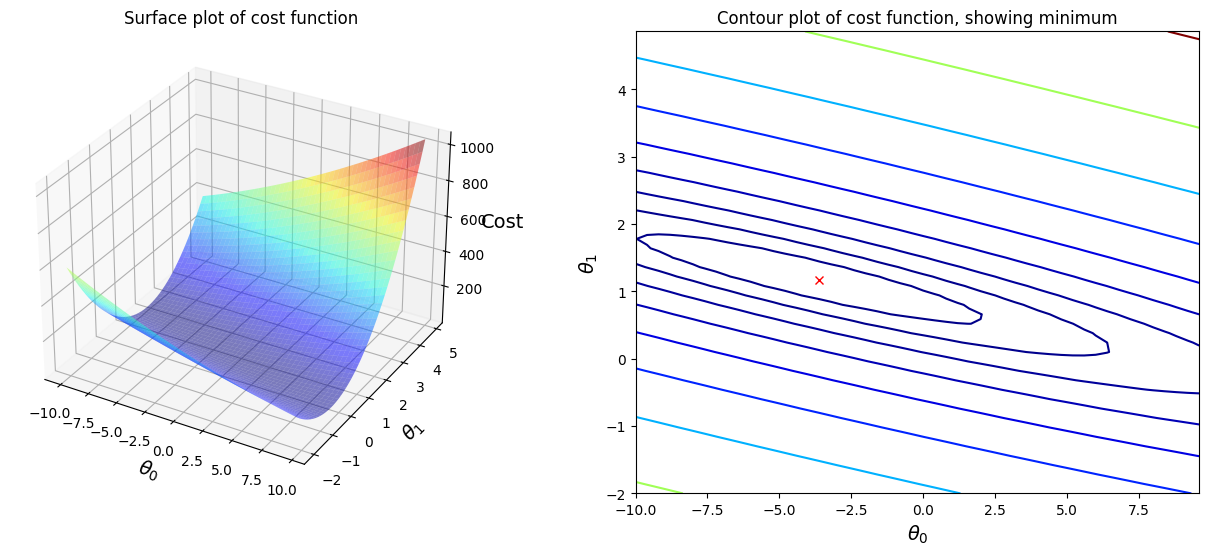

In [9]:
from mpl_toolkits.mplot3d import axes3d

# Create meshgrid.
xs = np.arange(-10, 10, 0.4)
ys = np.arange(-2, 5, 0.14)
xx, yy = np.meshgrid(xs, ys)

# Initialize J values to a matrix of 0's.
J_vals = np.zeros((xs.size, ys.size))

# Fill out J values.
for index, v in np.ndenumerate(J_vals):
    J_vals[index] = computeCost(x, y, [[xx[index]], [yy[index]]])

# Create a set of subplots.
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Create surface plot.
ax1.plot_surface(xx, yy, J_vals, alpha=0.5, cmap='jet')
ax1.set_zlabel('Cost', fontsize=14)
ax1.set_title('Surface plot of cost function')

# Create contour plot.
ax2.contour(xx, yy, J_vals, np.logspace(-2, 3, 20), cmap='jet')
ax2.plot(theta_f[0], theta_f[1], 'rx')
ax2.set_title('Contour plot of cost function, showing minimum')

# Create labels for both plots.
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=14)
    ax.set_ylabel(r'$\theta_1$', fontsize=14)